# 图像阈值
* 简单阈值：cv2.threshold(原图（灰度图）、阈值、maxVal、类型)

* 自适应阈值： cv2.adaptiveThreshold()

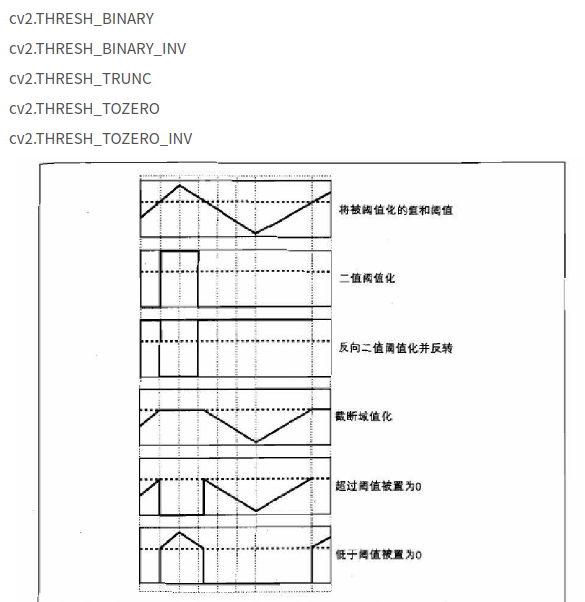

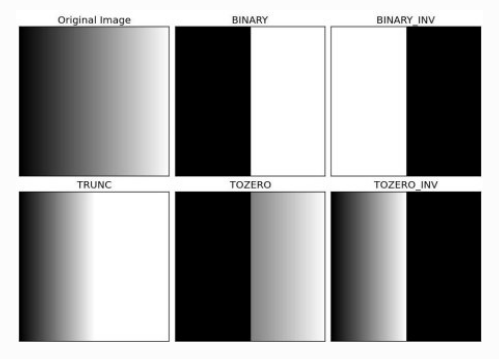

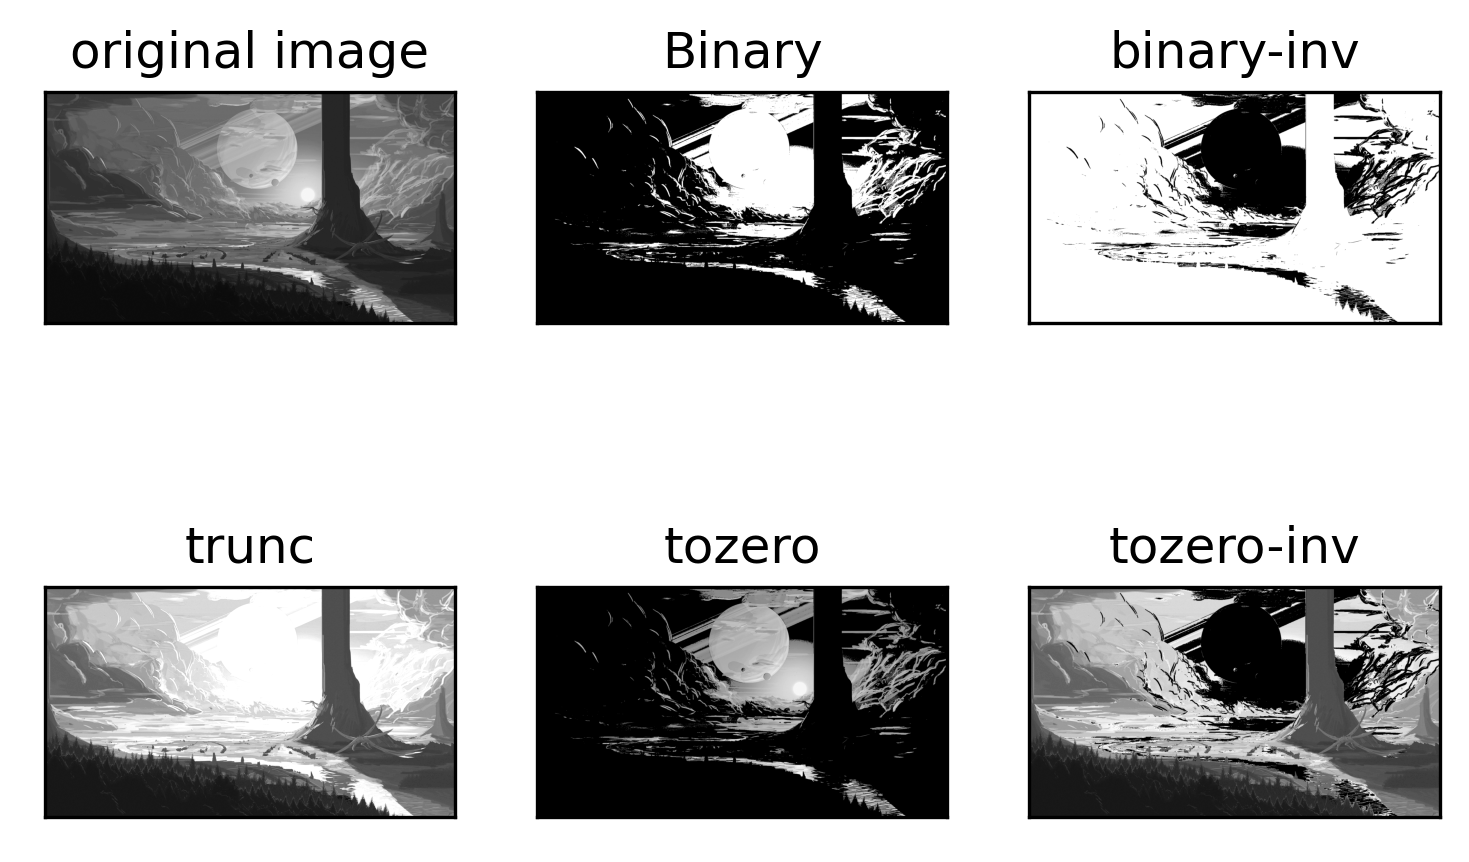

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import matplotlib
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率


img = cv2.imread('bizhi1.jpg',0)
ret , thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret , thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret , thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret , thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret , thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['original image','Binary','binary-inv','trunc','tozero','tozero-inv']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## 自适应阈值 

根据图像上的每一个小区域计算与其对应的阀值。因此在同一幅图像上的不同区域采用的是不同的阀值，从而使我们能在亮度不同的情况下得到更好的结果。

* Adaptive Method 指定计算阀值的方法

-cv2.ADAPTIVE_THRESH_MEAN_C:阀值取自相邻区域的平均值

-cv2.ADAPTIVE_THRESH_GAUSSIAN_C:阀值取自相邻区域的加权和，权重为一个高斯窗口

* Block Size 邻域大小（用来计算阀值的区域大小）

* C这就是一个常数，阀值就等于的平均值或者加权平均值减去这个常数

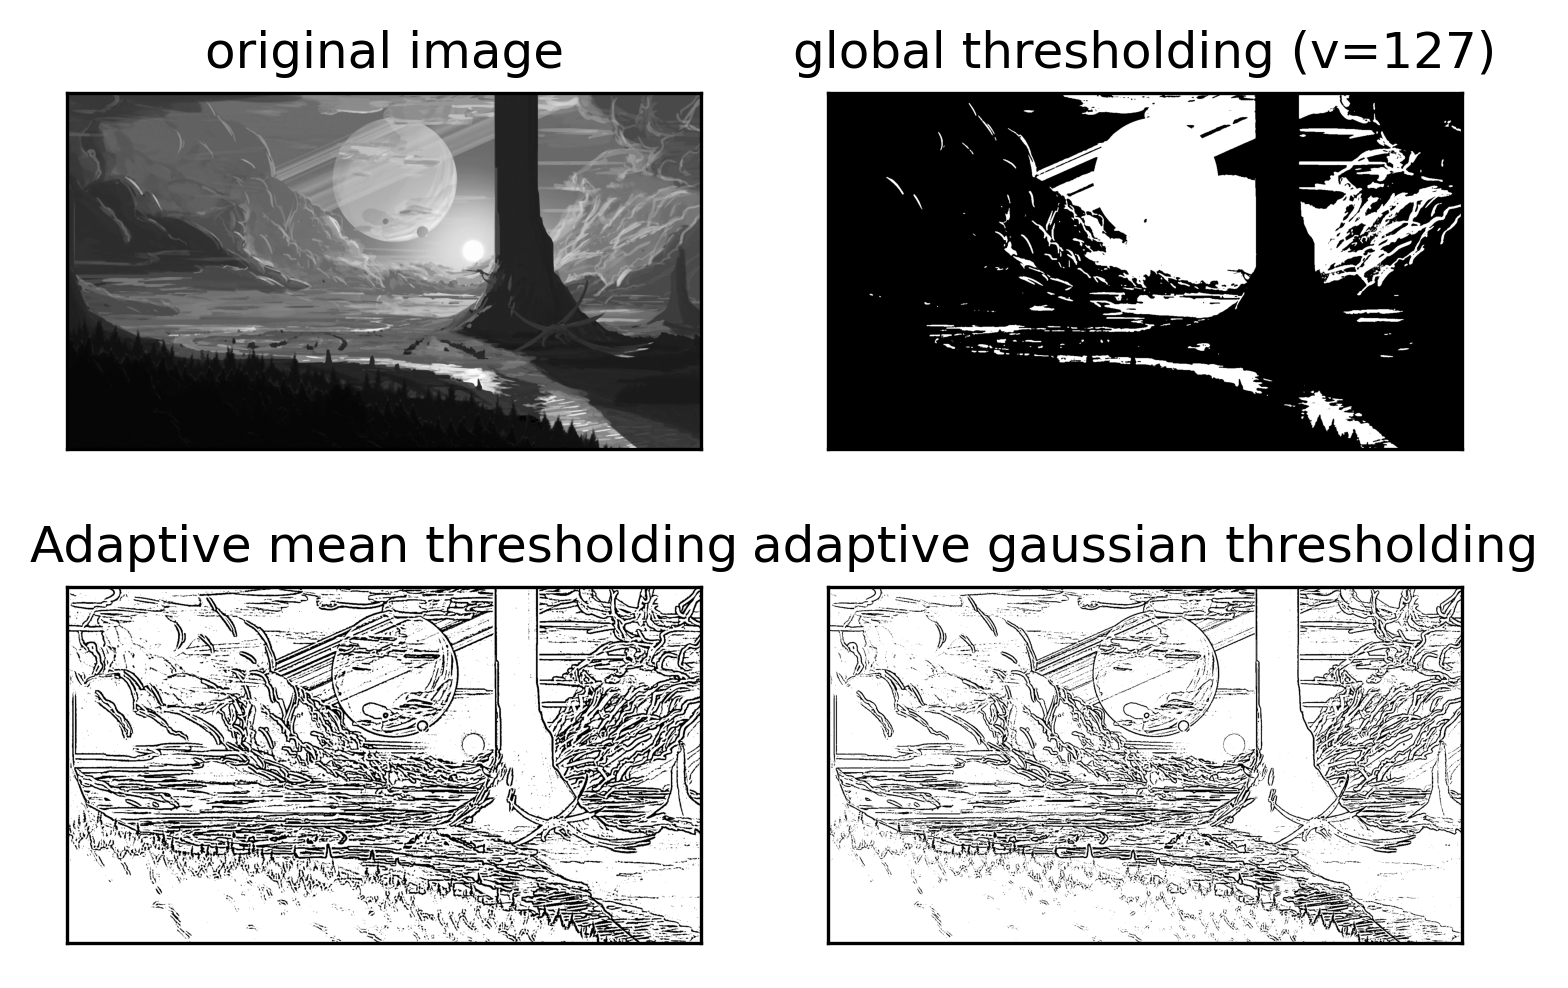

True

In [4]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

# pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率


img = cv2.imread('bizhi1.jpg',0)
#中值滤波
img = cv2.medianBlur(img,5)

ret , th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# 11为block size，2为C值
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY,11,2 )
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY,11,2)

titles = ['original image' , 'global thresholding (v=127)','Adaptive mean thresholding',
          'adaptive gaussian thresholding']
images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

cv2.imwrite('0-255.jpg',th1)
cv2.imwrite('Adaptive mean thresholding.jpg',th2)
cv2.imwrite('adaptive gaussian thresholding.jpg',th3)



## Otsu's 二值化 cv2.THRESH_OTSU（）
自动找到合适的阈值，非常适合于图像灰度直方图具有双峰的情况，他会在双峰之间找到一个值作为阈值，对于非双峰图像。

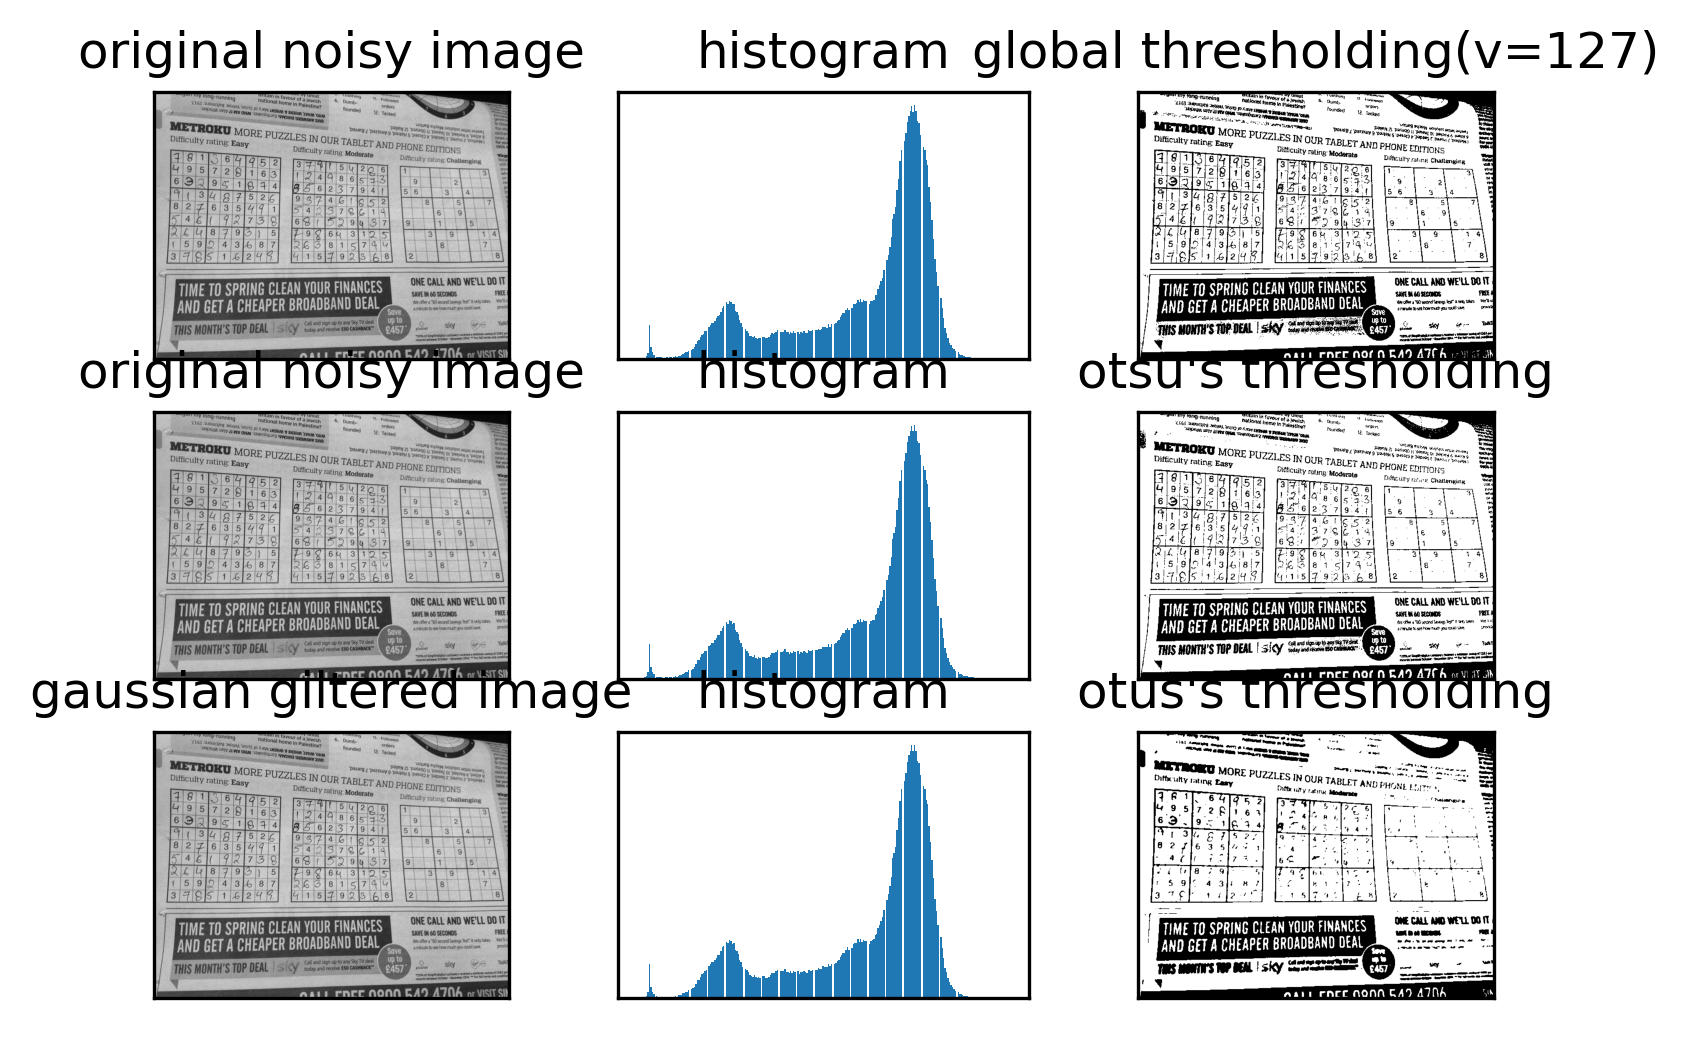

True

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import matplotlib
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

img = cv2.imread('shudu1.jpeg',0)

ret1,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

ret2,th2=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


#(5,5)为高斯核的大小，0为标准差
blur= cv2.GaussianBlur(img,(5,5),0)
#阀值一定要设为0
ret3,th3=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images=[img,0,th1,
         img,0,th2,
         img,0,th3]
titles =['original noisy image','histogram','global thresholding(v=127)',
          'original noisy image','histogram',"otsu's thresholding",
          'gaussian giltered image','histogram',"otus's thresholding"]
#这里使用了pyplot中画直方图的方法，plt.hist要注意的是他的参数是一维数组
#所以这里使用了（numpy）ravel方法，将多维数组转换成一维，也可以使用flatten方法
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]),plt.xticks([]),plt.yticks([])
    
plt.show()

cv2.imwrite('（2）0-255.jpg',th1)
cv2.imwrite('（2）Adaptive mean thresholding.jpg',th2)
cv2.imwrite('（2）adaptive gaussian thresholding.jpg',th3)


## Otsu's  二值化过程

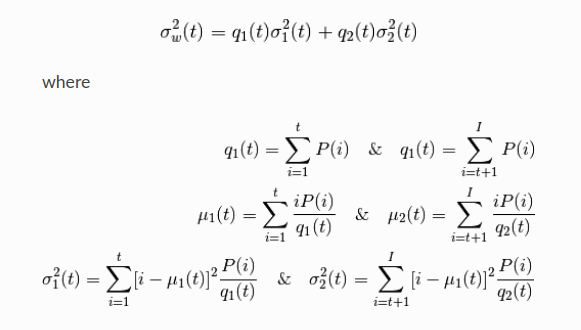

In [43]:
img = cv2.imread('bizhi1.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh,ret)

86 85.0


/home/cxking/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/home/cxking/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/cxking/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


True

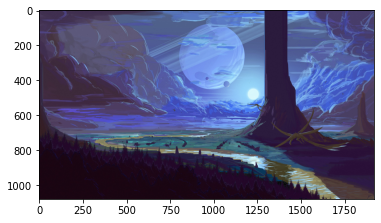

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

I = mpimg.imread('bizhi4.jpg')
# rgb = cv2.split(I)
# img = cv2.merge([b,g,r])
bgr = I[...,::-1]
# img= cv2.cvtColor(I,cv2.COLOR_BGR2BGRA)

# print(I.shape)
plt.imshow(bgr)
# print(I.shape)
# print(img.shape)

cv2.imwrite('bizhi3.jpg',bgr)